In [0]:
# Basic Libraries PROBLEM 1
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
houseData = pd.read_csv('train.csv')
houseData.head()

Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
0   1          60       RL  ...        WD         Normal    208500
1   2          20       RL  ...        WD         Normal    181500
2   3          60       RL  ...        WD         Normal    223500
3   4          70       RL  ...        WD        Abnorml    140000
4   5          60       RL  ...        WD         Normal    250000

[5 rows x 81 columns]

In [4]:
print("Data type: ",type(houseData))
print("Data dims: ",houseData.shape)

Data type:  <class 'pandas.core.frame.DataFrame'>
Data dims:  (1460, 81)


In [6]:
print(houseData.dtypes)

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object


In [11]:
#Part B
X = pd.DataFrame(houseData[["GrLivArea", "GarageArea"]])

f, axes = plt.subplots(1, 1, figsize=(16,8))
plt.scatter(x ="GrLivArea",y="GarageArea",data = X)

In [29]:
#PART C 
# Import KMeans from sklearn.cluster
from sklearn.cluster import KMeans

#Part D
# Guess the Number of Clusters 3
num_clust = 3

# Create Clustering Model using KMeans
kmeans = KMeans(n_clusters = num_clust)

# Fit the Clustering Model on the Data
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [39]:
#PART E
# Print the Cluster Centers end of part E
print("Features", "\GrLivArea", "\tGarageArea")
print()

for i, center in enumerate(kmeans.cluster_centers_):
    print("Cluster", i, end=":\t")
    for coord in center:
        print(round(coord, 2), end="\t")
    print()

Features \GrLivArea 	GarageArea

Cluster 0:	1916.18	586.91	
Cluster 1:	981.42	346.6	
Cluster 2:	2782.19	707.39	
Cluster 3:	1443.83	454.03	


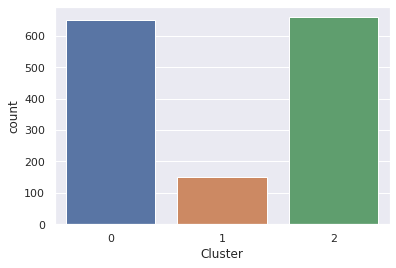

In [31]:
#PART E
# Predict the Cluster Labels
labels = kmeans.predict(X)

# Append Labels to the Data
X_labeled = X.copy()
X_labeled["Cluster"] = pd.Categorical(labels)

# Summary of the Cluster Labels
sb.countplot(X_labeled["Cluster"])

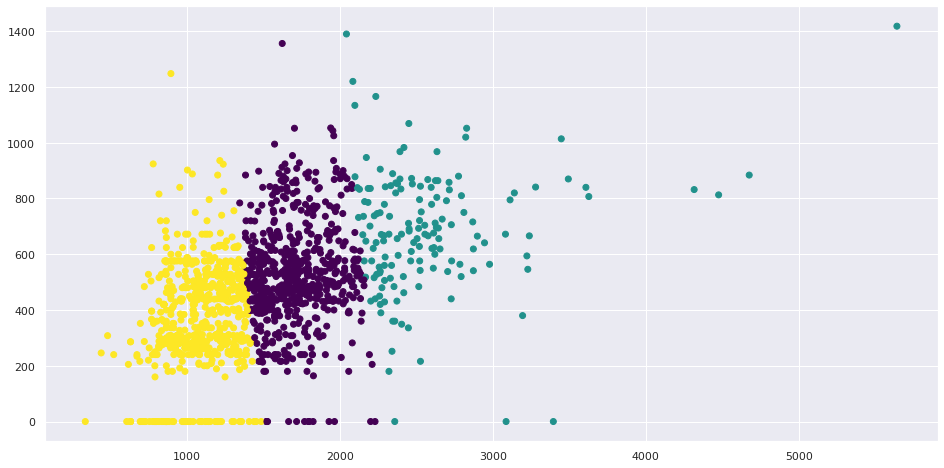

In [32]:
#PART E
# Visualize the Clusters in the Data
f, axes = plt.subplots(1, 1, figsize=(16,8))
plt.scatter(x = "GrLivArea", y = "GarageArea", c = "Cluster", cmap = 'viridis', data = X_labeled)

In [16]:
#Extra
# Print the Within Cluster Sum of Squares
print("Within Cluster Sum of Squares :", kmeans.inertia_)

Within Cluster Sum of Squares : 140817283.8069684


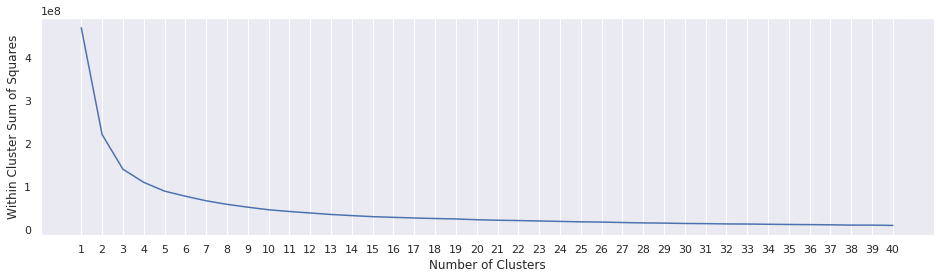

In [18]:
# Import KMeans from sklearn.cluster
from sklearn.cluster import KMeans

# Extract the Features from the Data
X = pd.DataFrame(houseData[["GrLivArea", "GarageArea"]])

# Vary the Number of Clusters
min_clust = 1
max_clust = 40

# Compute Within Cluster Sum of Squares
within_ss = []
for num_clust in range(min_clust, max_clust+1):
    kmeans = KMeans(n_clusters = num_clust)
    kmeans.fit(X)
    within_ss.append(kmeans.inertia_)

# Plot Within SS vs Number of Clusters
f, axes = plt.subplots(1, 1, figsize=(16,4))
plt.plot(range(min_clust, max_clust+1), within_ss)
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster Sum of Squares')
plt.xticks(np.arange(min_clust, max_clust+1, 1.0))
plt.grid(which='major', axis='y')
plt.show()

Cluster 0:	1908.24	583.04	
Cluster 1:	979.89	346.08	
Cluster 2:	2777.92	704.52	
Cluster 3:	1436.87	454.0	

Within Cluster Sum of Squares : 110440381.3962088



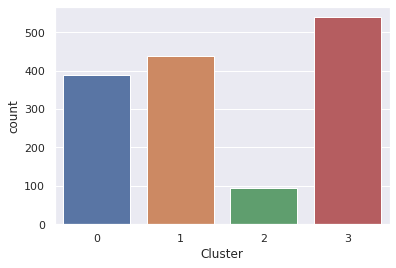

In [19]:
# Set "optimal" Number of Clusters
num_clust = 4

# Create Clustering Model using KMeans
kmeans = KMeans(n_clusters = num_clust)                 

# Fit the Clustering Model on the Data
kmeans.fit(X)

# Print the Cluster Centers
for i, center in enumerate(kmeans.cluster_centers_):
    print("Cluster", i, end=":\t")
    for coord in center:
        print(round(coord, 2), end="\t")
    print()
print()

# Print the Within Cluster Sum of Squares
print("Within Cluster Sum of Squares :", kmeans.inertia_)
print()

# Predict the Cluster Labels
labels = kmeans.predict(X)

# Append Labels to the Data
X_labeled = X.copy()
X_labeled["Cluster"] = pd.Categorical(labels)

# Summary of the Cluster Labels
sb.countplot(X_labeled["Cluster"])

In [21]:
# Visualize the Clusters in the Data
f, axes = plt.subplots(1, 1, figsize=(16,8))
plt.scatter(x = "GrLivArea", y = "GarageArea", c = "Cluster", cmap = 'viridis', data = X_labeled)

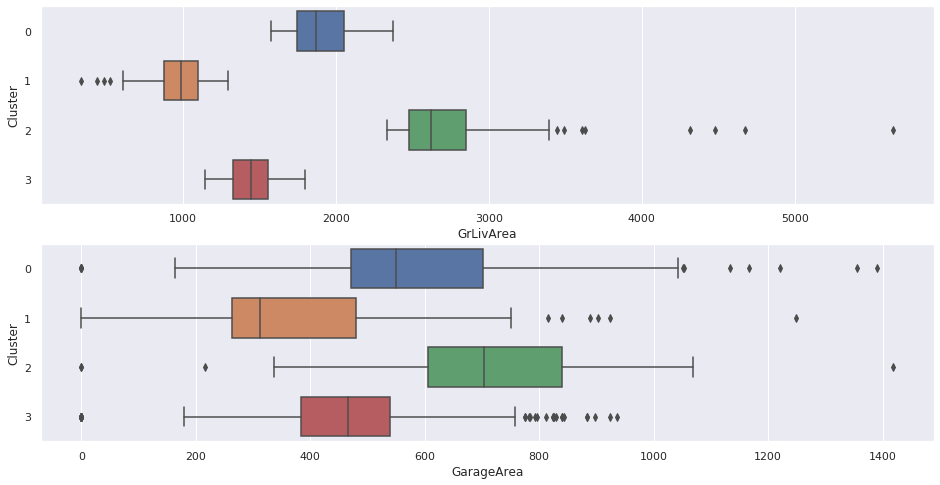

In [23]:
# Boxplots for the Features against the Clusters
f, axes = plt.subplots(2, 1, figsize=(16,8))
sb.boxplot(x = 'GrLivArea', y = 'Cluster', data = X_labeled, ax = axes[0])
sb.boxplot(x = 'GarageArea', y = 'Cluster', data = X_labeled, ax = axes[1])

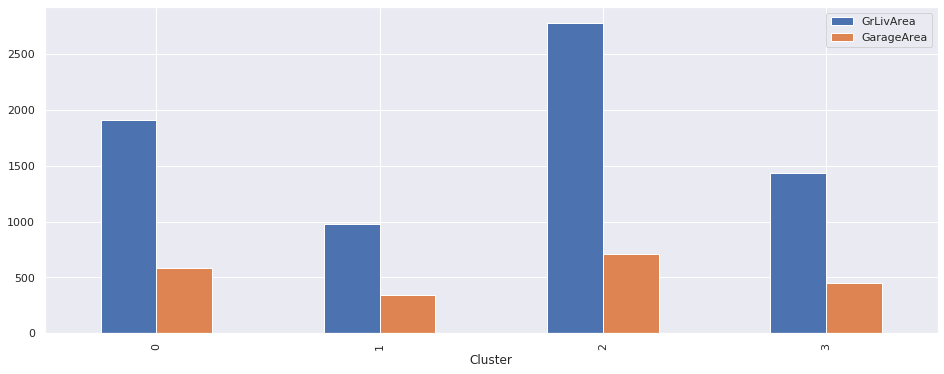

In [24]:
# Average Behaviour of each Cluster
cluster_data = pd.DataFrame(X_labeled.groupby(by = "Cluster").mean())
cluster_data.plot.bar(figsize = (16,6))

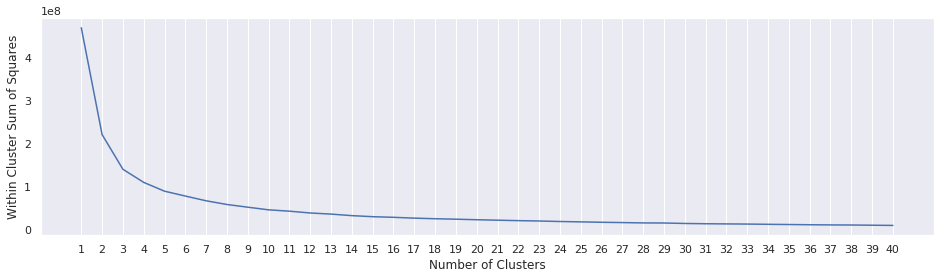

In [34]:
# Import KMeans from sklearn.cluster
from sklearn.cluster import KMeans

# Extract the Features from the Data
X = pd.DataFrame(houseData[["GrLivArea", "GarageArea"]])

# Set the Initialization to KMeans++
init_algo = 'k-means++'

# Vary the Number of Clusters
min_clust = 1
max_clust = 40

# Compute Within Cluster Sum of Squares
within_ss = []
for num_clust in range(min_clust, max_clust+1):
    kmeans = KMeans(n_clusters = num_clust,        # number of clusters
                    init = init_algo,              # initialization algorithm
                    n_init = 5)                    # number of initializations
    kmeans.fit(X)
    within_ss.append(kmeans.inertia_)

# Plot Within SS vs Number of Clusters
f, axes = plt.subplots(1, 1, figsize=(16,4))
plt.plot(range(min_clust, max_clust+1), within_ss)
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster Sum of Squares')
plt.xticks(np.arange(min_clust, max_clust+1, 1.0))
plt.grid(which='major', axis='y')
plt.show()

Features 	GrLivArea 	GarageArea

Cluster 0:	1916.18	586.91	
Cluster 1:	981.42	346.6	
Cluster 2:	2782.19	707.39	
Cluster 3:	1443.83	454.03	

Within Cluster Sum of Squares : 110413578.52594802



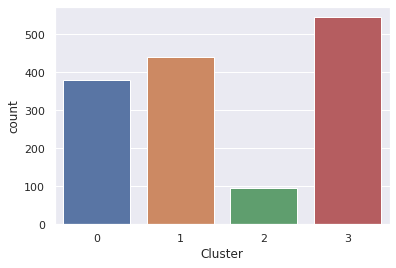

In [35]:
# Set "optimal" Number of Clusters
num_clust = 4

# Set the Initialization to KMeans++
init_algo = 'k-means++'

# Create Clustering Model using KMeans
kmeans = KMeans(n_clusters = num_clust, init = init_algo, n_init = 20)                 

# Fit the Clustering Model on the Data
kmeans.fit(X)

# Print the Cluster Centers
print("Features", "\tGrLivArea", "\tGarageArea")
print()

for i, center in enumerate(kmeans.cluster_centers_):
    print("Cluster", i, end=":\t")
    for coord in center:
        print(round(coord, 2), end="\t")
    print()
print()

# Print the Within Cluster Sum of Squares
print("Within Cluster Sum of Squares :", kmeans.inertia_)
print()

# Predict the Cluster Labels
labels = kmeans.predict(X)

# Append Labels to the Data
X_labeled = X.copy()
X_labeled["Cluster"] = pd.Categorical(labels)

# Summary of the Cluster Labels
sb.countplot(X_labeled["Cluster"])

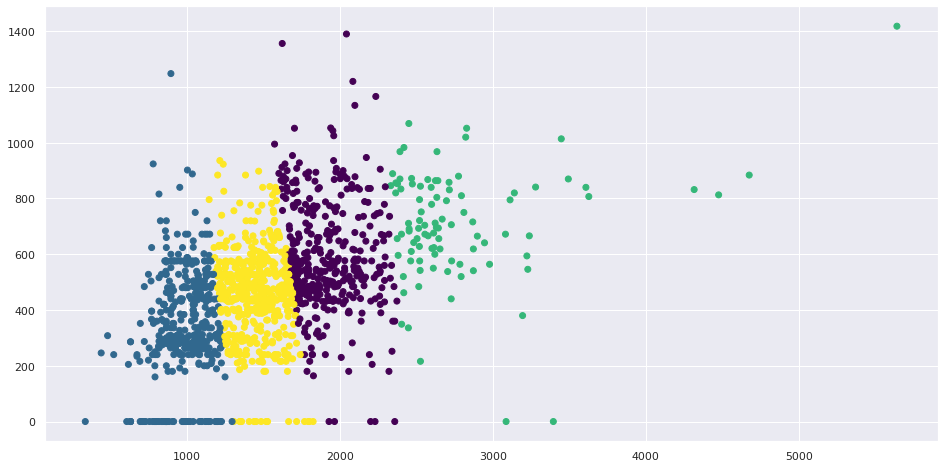

In [37]:
# Visualize the Clusters in the Data
f, axes = plt.subplots(1, 1, figsize=(16,8))
plt.scatter(x = "GrLivArea", y = "GarageArea", c = "Cluster", cmap = 'viridis', data = X_labeled)

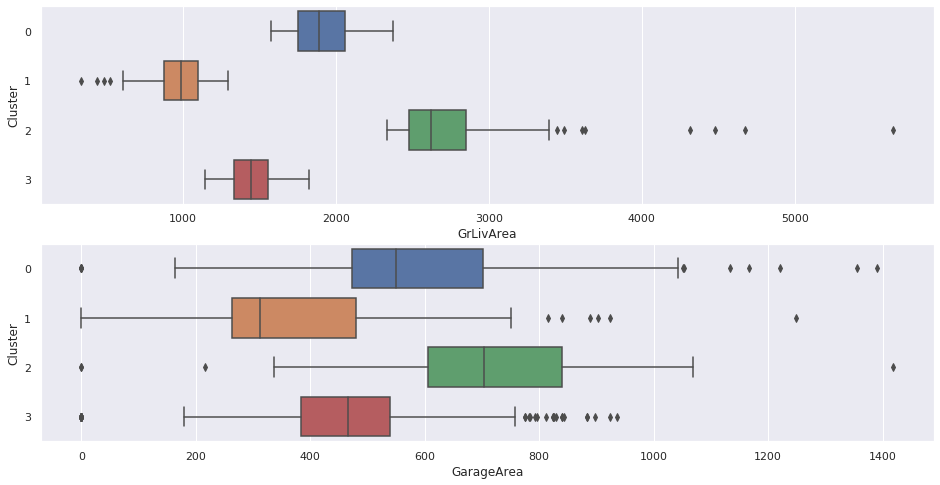

In [38]:
# Boxplots for the Features against the Clusters
f, axes = plt.subplots(2, 1, figsize=(16,8))
sb.boxplot(x = 'GrLivArea', y = 'Cluster', data = X_labeled, ax = axes[0])
sb.boxplot(x = 'GarageArea', y = 'Cluster', data = X_labeled, ax = axes[1])

In [0]:
#Problem 2a
X = pd.DataFrame(houseData[['GrLivArea','GarageArea']])

In [41]:
#Part 2b
f, axes = plt.subplots(1, 1, figsize=(16,8))
plt.scatter(x = "GrLivArea", y = "GarageArea", data = X)

In [42]:
#2c
# Import LocalOutlierFactor from sklearn.neighbors
from sklearn.neighbors import LocalOutlierFactor

# Set the Parameters for Neighborhood
num_neighbors = 20      # Number of Neighbors
cont_fraction = 0.05    # Fraction of Anomalies

# Create Anomaly Detection Model using LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors = num_neighbors, contamination = cont_fraction)

# Fit the Model on the Data and Predict Anomalies
lof.fit(X)

LocalOutlierFactor(algorithm='auto', contamination=0.05, leaf_size=30,
                   metric='minkowski', metric_params=None, n_jobs=None,
                   n_neighbors=20, novelty=False, p=2)

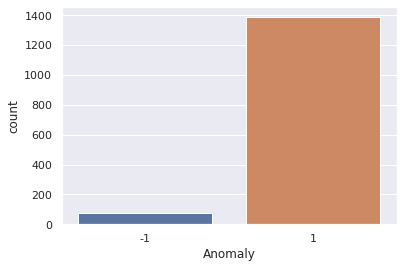

In [43]:
# Predict the Anomalies
labels = lof.fit_predict(X)

# Append Labels to the Data
X_labeled = X.copy()
X_labeled["Anomaly"] = pd.Categorical(labels)

# Summary of the Anomaly Labels
sb.countplot(X_labeled["Anomaly"])

In [44]:
# Visualize the Anomalies in the Data
f, axes = plt.subplots(1, 1, figsize=(16,8))
plt.scatter(x = "GrLivArea", y = "GarageArea", c = "Anomaly", cmap = 'viridis', data = X_labeled)

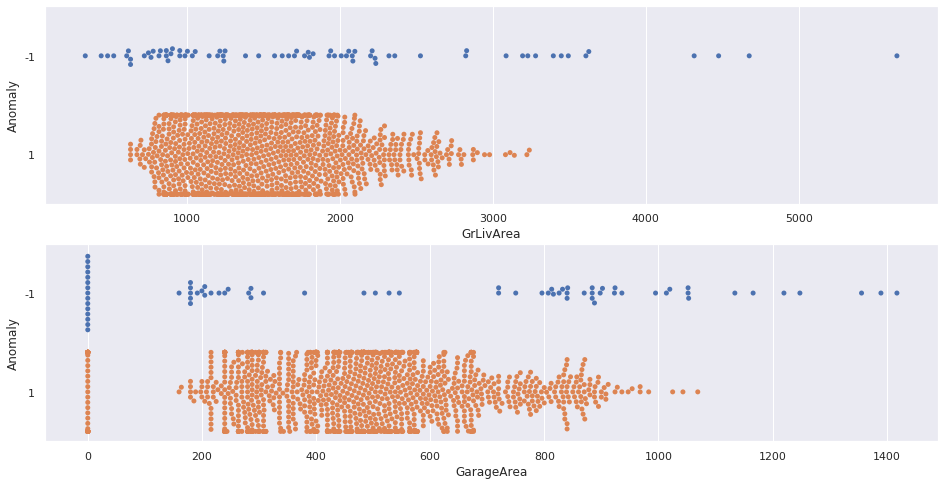

In [45]:
# Boxplots for the Features for the Anomalies
f, axes = plt.subplots(2, 1, figsize=(16,8))
sb.swarmplot(x = 'GrLivArea', y = 'Anomaly', data = X_labeled, ax = axes[0])
sb.swarmplot(x = 'GarageArea', y = 'Anomaly', data = X_labeled, ax = axes[1])

In [0]:
#different clustering algorithms should result in different set of overlapping anomalies 
#LEE ZHEN WEI U1922813B